## NBA EDA Project
In this Jupyter notebook, I aim to determine the most important metrics to an NBA team in regards to winning. I will provide analysis on the provided data and give insights on the important statistics.

This analysis reveals that while many statistics correlate with winning, team efficiency metrics like Field Goal Percentage and limiting turnovers show the strongest relationship with a team's win percentage in the modern NBA.

## Setup

In [355]:
# ========== Import Libraries ==========
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


nba_df = pd.read_csv("./regular_season_totals_2010_2024.csv")


# ========== Preview Data ==========
print(nba_df.shape)
print(nba_df.columns)
nba_df.head(10)

(33316, 57)
Index(['SEASON_YEAR', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS',
       'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK',
       'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK',
       'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK',
       'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK',
       'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'AVAILABLE_FLAG'],
      dtype='object')


,SEASON_YEAR,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,AVAILABLE_FLAG
0,2022-23,1610612744,GSW,Golden State Warriors,22201230,2023-04-09T00:00:00,GSW @ POR,W,48.0,58,...,1,1578,55,512,457,678,2455,3,1,1.0
1,2020-21,1610612749,MIL,Milwaukee Bucks,22000051,2020-12-29T00:00:00,MIL @ MIA,W,48.0,51,...,146,1636,33,1830,1361,1552,1220,14,7,1.0
2,2013-14,1610612751,BKN,Brooklyn Nets,21300359,2013-12-16T00:00:00,BKN vs. PHI,W,48.0,47,...,22,2280,406,1979,1,1004,453,19,12,1.0
3,2013-14,1610612757,POR,Portland Trail Blazers,21300347,2013-12-14T00:00:00,POR @ PHI,W,48.0,52,...,2,2065,628,204,1269,272,2190,4,15,1.0
4,2018-19,1610612745,HOU,Houston Rockets,21801200,2019-04-07T00:00:00,HOU vs. PHX,W,48.0,53,...,84,176,149,917,1,244,1725,4,20,1.0
5,2012-13,1610612745,HOU,Houston Rockets,21200718,2013-02-05T00:00:00,HOU vs. GSW,W,48.0,46,...,9,112,1623,2035,1115,1974,154,2,28,1.0
6,2013-14,1610612757,POR,Portland Trail Blazers,21300480,2014-01-02T00:00:00,POR vs. CHA,W,48.0,54,...,29,1704,896,1979,195,2009,2446,10,33,1.0
7,2017-18,1610612751,BKN,Brooklyn Nets,21701193,2018-04-07T00:00:00,BKN @ CHI,W,48.0,46,...,22,1319,258,55,41,725,2222,166,45,1.0
8,2019-20,1610612750,MIN,Minnesota Timberwolves,21900782,2020-02-08T00:00:00,MIN vs. LAC,W,48.0,52,...,5,689,772,1447,1008,1021,1627,15,62,1.0
9,2014-15,1610612737,ATL,Atlanta Hawks,21400939,2015-03-09T00:00:00,ATL vs. SAC,W,48.0,53,...,1,825,919,549,191,686,2386,21,77,1.0


## Data Cleaning and Manipulating

There are various columns to be dropped. Of the list below, the most common to be dropped are the "...RANK" columns, and this is because they are redundant to the raw statistics. They are not used in the analysis I provide. 

In [356]:
# ========== Remove Unnecessary Columns ==========
cols_to_remove = ["TEAM_ID", "TEAM_NAME", "MATCHUP", "MIN", "PTS", "PLUS_MINUS", "GP_RANK", "W_RANK", "L_RANK", "W_PCT_RANK", 
                  "MIN_RANK", "FGM_RANK", "FGA_RANK", "FG_PCT_RANK", "FG3M_RANK", "FG3A_RANK", 
                  "FG3_PCT_RANK", "FTM_RANK", "FTA_RANK", "FT_PCT_RANK", "OREB_RANK", "DREB_RANK", 
                  "REB_RANK", "AST_RANK", "TOV_RANK", "STL_RANK", "BLK_RANK", "BLKA_RANK", 
                  "PF_RANK", "PFD_RANK", "PTS_RANK", "PLUS_MINUS_RANK", "AVAILABLE_FLAG"]


nba_df = nba_df.drop(cols_to_remove, axis=1)
nba_df.columns = nba_df.columns.str.strip()
nba_df.columns = nba_df.columns.str.replace("\n","", regex=False)


# ========== Remove Outdated Rows ==========
nba_df["SEASON_YEAR"] = nba_df["SEASON_YEAR"].astype(str)
nba_df = nba_df[nba_df["SEASON_YEAR"].str.startswith(("2020","2021","2022","2023","2024"))]


# ========== Modify Existing Columns ==========
nba_df["WL"] = nba_df["WL"].map({"W": 1, "L": 0})
nba_df = nba_df.rename(columns={"TEAM_ABBREVIATION": "TEAM", 
                                "SEASON_YEAR": "SEASON",
                                "GAME_DATE": "DATE"})


# ========== Preview Data After Cleaning ==========
print(nba_df.shape)
print(nba_df.columns)
nba_df.head(10)


(9540, 24)
Index(['SEASON', 'TEAM', 'GAME_ID', 'DATE', 'WL', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD'],
      dtype='object')


,SEASON,TEAM,GAME_ID,DATE,WL,FGM,FGA,FG_PCT,FG3M,FG3A,...,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD
0,2022-23,GSW,22201230,2023-04-09T00:00:00,1,58,96,0.604,27,49,...,9,49,58,47,16.0,13,6,3,18,9
1,2020-21,MIL,22000051,2020-12-29T00:00:00,1,51,92,0.554,29,51,...,10,35,45,32,17.0,14,2,6,22,18
10,2023-24,HOU,22301024,2024-03-23T00:00:00,1,54,97,0.557,27,49,...,12,32,44,31,9.0,7,3,4,26,11
13,2022-23,BOS,22200135,2022-11-05T00:00:00,1,47,88,0.534,27,51,...,8,26,34,30,13.0,5,2,4,17,14
17,2021-22,UTA,22100339,2021-12-03T00:00:00,1,45,81,0.556,27,51,...,9,35,44,26,20.0,3,3,3,27,22
25,2020-21,HOU,22000318,2021-02-01T00:00:00,1,49,102,0.480,28,52,...,10,40,50,30,13.0,8,6,8,20,13
31,2020-21,UTA,22000478,2021-02-22T00:00:00,1,45,85,0.529,28,55,...,8,37,45,34,23.0,7,7,2,19,17
33,2023-24,GSW,22301155,2024-04-09T00:00:00,1,47,80,0.588,26,41,...,4,38,42,37,15.0,3,12,3,17,14
34,2021-22,MIL,22100161,2021-11-10T00:00:00,1,40,90,0.444,26,50,...,13,37,50,29,15.0,4,4,10,17,17
37,2023-24,BOS,22300872,2024-03-03T00:00:00,1,53,96,0.552,25,49,...,7,44,51,35,8.0,10,5,3,19,13


As you may have noticed, the data was limited to stats from seasons in 2020-2024. This is to keep data fresh so I can pull insights that reflect the modern NBA. 

## Feature Engineering

In [357]:
# ========== Classify Numerical Statistics ==========
high_is_good = ["FGM", "FG_PCT", "FG3M", "FG3_PCT", "FTM", "FT_PCT", "OREB", "DREB", "REB", 
                "AST", "STL", "BLK", "PFD"]
low_is_good = ["TOV", "PF", "BLKA"]
depends = ["FGA", "FG3A", "FTA"]


# ========== Feature Engineering ==========
# Convert DATE to DateTime Format
nba_df["DATE"] = pd.to_datetime(nba_df["DATE"], errors="coerce", utc=False)
# Sort the Data Frame by Team, Season, and Game Date
nba_df = nba_df.sort_values(["TEAM","SEASON","DATE"])


# Create Rolling Averages for Last 5 Games (min 5 games)
stats_cols = high_is_good + low_is_good + depends

def add_lastN_avg_strict(df, cols, win):
    g = df.groupby(["TEAM","SEASON"], group_keys=False)
    for c in cols:
        out = f"{c}_last{win}_avg"
        df[out] = g[c].shift(1).rolling(win, min_periods=win).mean()
    return df

nba_df = add_lastN_avg_strict(nba_df, stats_cols, win=5)


# Create Dynamic Win Percentage Based on Cumulative Wins and Games Played
nba_df["CUM_WINS"] = (
    nba_df.groupby(["TEAM", "SEASON"])["WL"]
          .cumsum()
          .shift(1))
nba_df["CUM_GAMES"] = (nba_df.groupby(["TEAM", "SEASON"]).cumcount())
nba_df["WIN_PCT"] = nba_df["CUM_WINS"] / nba_df["CUM_GAMES"]
nba_df.loc[nba_df["CUM_GAMES"] == 0, "WIN_PCT"] = np.nan     # Handle first game of season (no data)


Single-game stats can be noisy. To better capture a team's form and typical performance level at a given time, 5-game rolling averages were calculated for key metrics. Similarly, the win% was calculated to be dynamic to reflect how it changes throughout the season.

## Determining Most Important Statistics by Correlation
With the rolling averages and win percentages computed, I will now use correlation to determine the most important metrics in an NBA game (based on recent performance).

In [358]:
# ========== Correlating Last-5 Rolling Averages with Dyanmic Win% ==========
nba_df = nba_df.sort_values(["TEAM","SEASON","DATE"]).copy()

# Find Usable Last-5 Columns (we created these above)
last5_cols = [c for c in nba_df.columns if c.endswith("_last5_avg")]

# Filter Out Junks (too few non-nulls)
min_n_overall  = 50
min_n_per_seas = 30
candidates = [c for c in last5_cols if nba_df[c].notna().sum() >= min_n_overall]

# Correlation Helper Function
def safe_corr(x, y, method="pearson", min_n=50):
    s = pd.concat([x, y], axis=1).dropna()
    if len(s) < min_n:
        return np.nan
    return s.corr(method=method).iloc[0, 1]

# Overall Correlations (league-wide, all seasons)
rows = []
for col in candidates:
    base = col[:-len("_last5_avg")]
    r_p = safe_corr(nba_df[col], nba_df["WIN_PCT"], method="pearson",  min_n=min_n_overall)
    r_s = safe_corr(nba_df[col], nba_df["WIN_PCT"], method="spearman", min_n=min_n_overall)
    rows.append({
        "STAT": base,
        "Pearson r": r_p,
        "Spearman rho": r_s,
        "Absolute Pearson": abs(r_p) if pd.notna(r_p) else np.nan,
        "Absolute Spearman": abs(r_s) if pd.notna(r_s) else np.nan,})

overall = (pd.DataFrame(rows)
           .sort_values(["Absolute Pearson","Absolute Spearman"], ascending=False)
           .reset_index(drop=True))



# ========== Display Findings ==========
display_cols = ["STAT","Pearson r","Spearman rho"]
print("Top correlations with pre-game Win%")
display(overall[display_cols].head(15))


Top correlations with pre-game Win%


,STAT,Pearson r,Spearman rho
0,FG_PCT,0.364657,0.358164
1,BLKA,-0.312298,-0.299602
2,FG3_PCT,0.297688,0.297822
3,FGM,0.279891,0.269233
4,FG3M,0.249334,0.240833
5,DREB,0.238854,0.223805
6,TOV,-0.211759,-0.199526
7,AST,0.163594,0.169748
8,REB,0.156950,0.135022
9,PF,-0.143560,-0.128152


## Visualizing Metrics
Based on the computed correlations, we can create charts on how each metric affects each other.

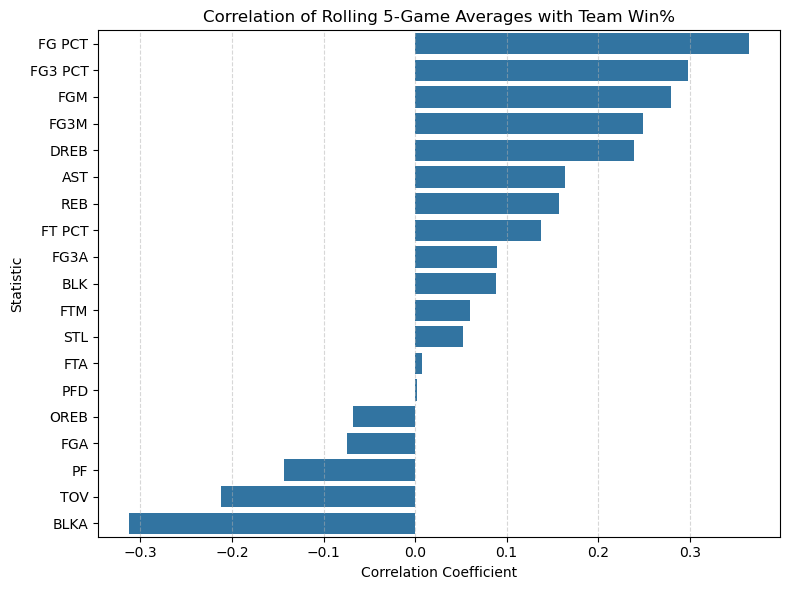

In [359]:
# Select only rolling average columns
rolling_cols = [c for c in nba_df.columns if c.endswith("_last5_avg")]

# ========= Compute correlation vs. Win% =========
corr = nba_df[rolling_cols + ["WIN_PCT"]].corr(numeric_only=True)["WIN_PCT"].drop("WIN_PCT")

# ========= Clean up names =========
corr.index = (
    corr.index
    .str.replace("_last5_avg", "")
    .str.replace("_", " ")
    .str.upper()
)

# ========= Sort strongest correlations =========
corr = corr.sort_values(ascending=False)

# ========= Plot =========
plt.figure(figsize=(8,6))
sns.barplot(x=corr.values, y=corr.index)
plt.title("Correlation of Rolling 5-Game Averages with Team Win%")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Statistic")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

To identify the most impactful metrics on a team's success, a correlation analysis was performed between the 5-game rolling averages of various statistics and the team's cumulative win percentage. The results, visualized in the bar chart, clearly indicate that shooting efficiency is paramount to winning in the modern NBA. Field goal percentage shows the strongest positive correlation (r = 0.36) with win percentage, suggesting that simply making shots at a higher rate than opponents is a primary driver of success. Conversely, the number of a team's shots blocked by the opponent (BLKA) has the strongest negative correlation (r = -0.31), reinforcing that inefficient offensive possessions are highly detrimental. Other key metrics with a strong positive correlation include 3-point percentage and field goals made, further emphasizing offensive efficiency and output.


This bar chart is great at helping us identify how recent performance in given metrics change win %. But we still need to consider that these metrics will change vary based on a number of other factors, and one of the things we can look at is how these metrics change based on if a team wins or loses. Below we can find how a few key stats may vary:

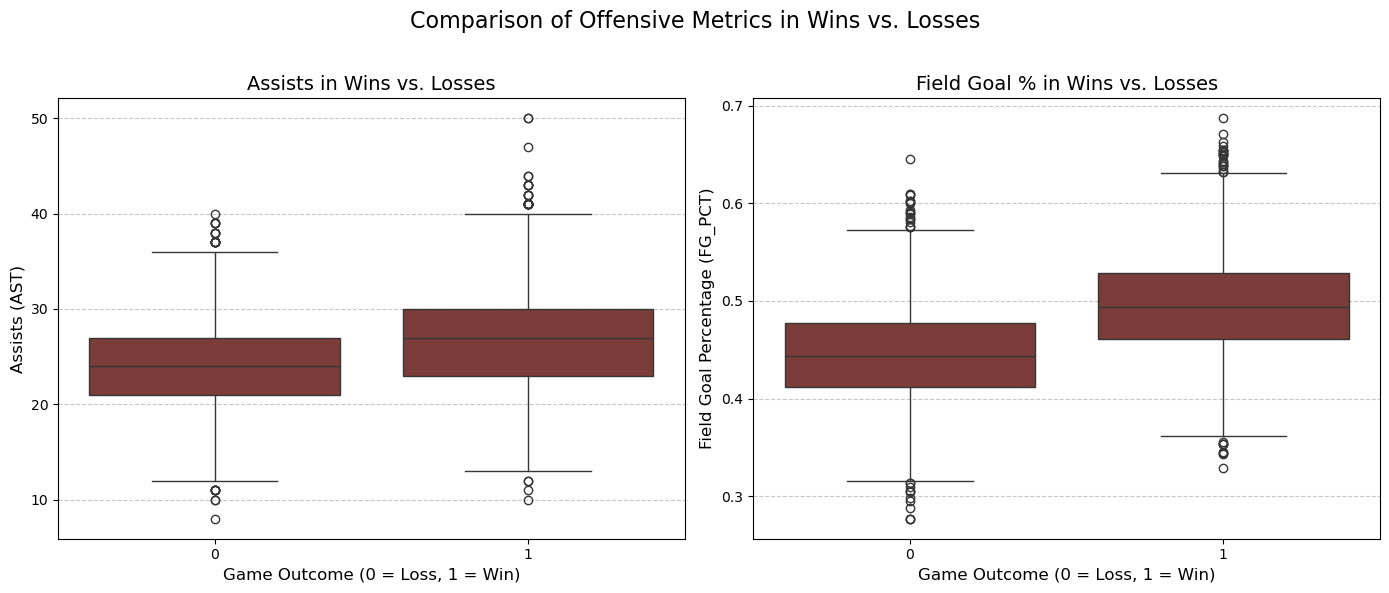

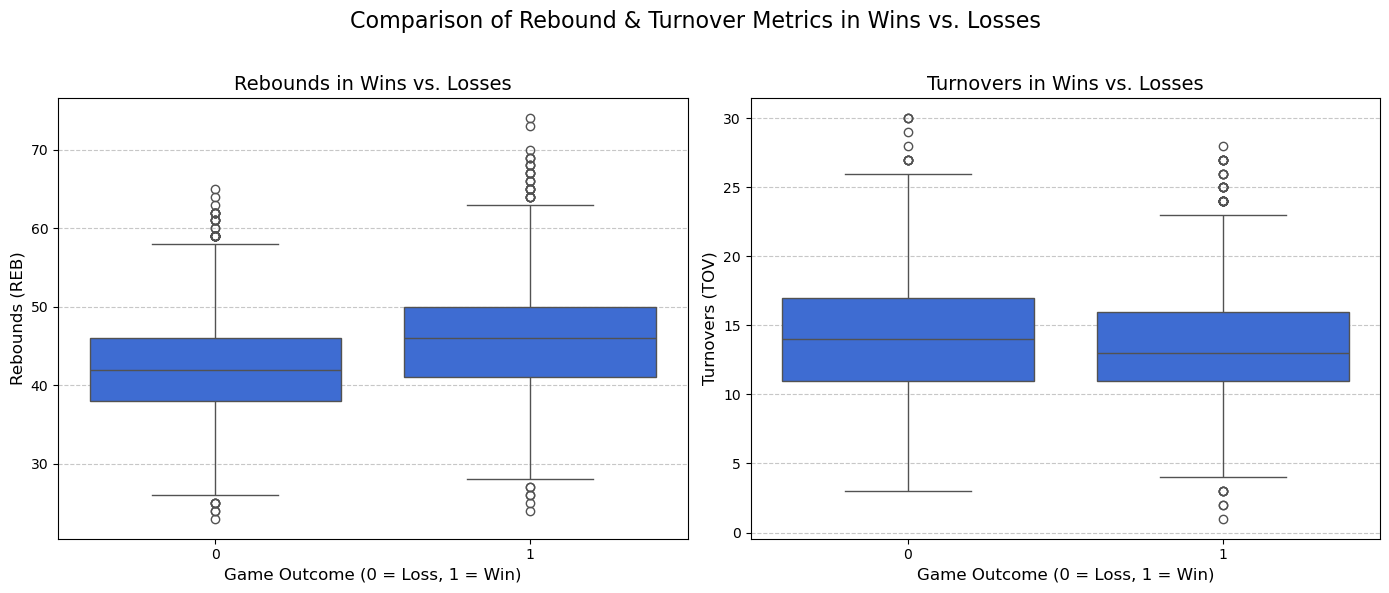

In [360]:
# Chart 1: Offensive Metrics (Assists and Field Goal Percentage)
plt.figure(figsize=(14, 6))
plt.suptitle('Comparison of Offensive Metrics in Wins vs. Losses', fontsize=16)

# Subplot for Assists
plt.subplot(1, 2, 1)
sns.boxplot(x='WL', y='AST', data=nba_df, color = "#85342e")
plt.title('Assists in Wins vs. Losses', fontsize=14)
plt.xlabel('Game Outcome (0 = Loss, 1 = Win)', fontsize=12)
plt.ylabel('Assists (AST)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot for Field Goal Percentage
plt.subplot(1, 2, 2)
sns.boxplot(x='WL', y='FG_PCT', data=nba_df, color = "#85342e")
plt.title('Field Goal % in Wins vs. Losses', fontsize=14)
plt.xlabel('Game Outcome (0 = Loss, 1 = Win)', fontsize=12)
plt.ylabel('Field Goal Percentage (FG_PCT)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Chart 2: Rebounds and Turnovers
plt.figure(figsize=(14, 6))
plt.suptitle('Comparison of Rebound & Turnover Metrics in Wins vs. Losses', fontsize=16)

# Subplot for Rebounds
plt.subplot(1, 2, 1)
sns.boxplot(x='WL', y='REB', data=nba_df, color="#2563EB")
plt.title('Rebounds in Wins vs. Losses', fontsize=14)
plt.xlabel('Game Outcome (0 = Loss, 1 = Win)', fontsize=12)
plt.ylabel('Rebounds (REB)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot for Turnovers
plt.subplot(1, 2, 2)
sns.boxplot(x='WL', y='TOV', data=nba_df, color="#2563EB")
plt.title('Turnovers in Wins vs. Losses', fontsize=14)
plt.xlabel('Game Outcome (0 = Loss, 1 = Win)', fontsize=12)
plt.ylabel('Turnovers (TOV)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Here we can see that the data changes in wins and losses, and that it can alter its correlation to win %. In the FG% chart we can note that field goal percentage in wins is noticeably higher than in losses. Here, the data tells us that efficiency is key, and scoring on a higher percentage of shots is crucial, concurrent with our original correlation bar chart.

Turnovers are markedly lower in wins, highlighting the critical importance of ball security. At the same time, winning teams secure more total rebounds, indicating that controlling possessions on both ends of the floor is a key factor in securing a victory.

Something to note, however, is that "being efficient" isn't the end of the story. In the following chart we can note that teams that attempt more 3 pointers generally are more efficient at making them in the first place, leading to more points scored, leading to more wins.

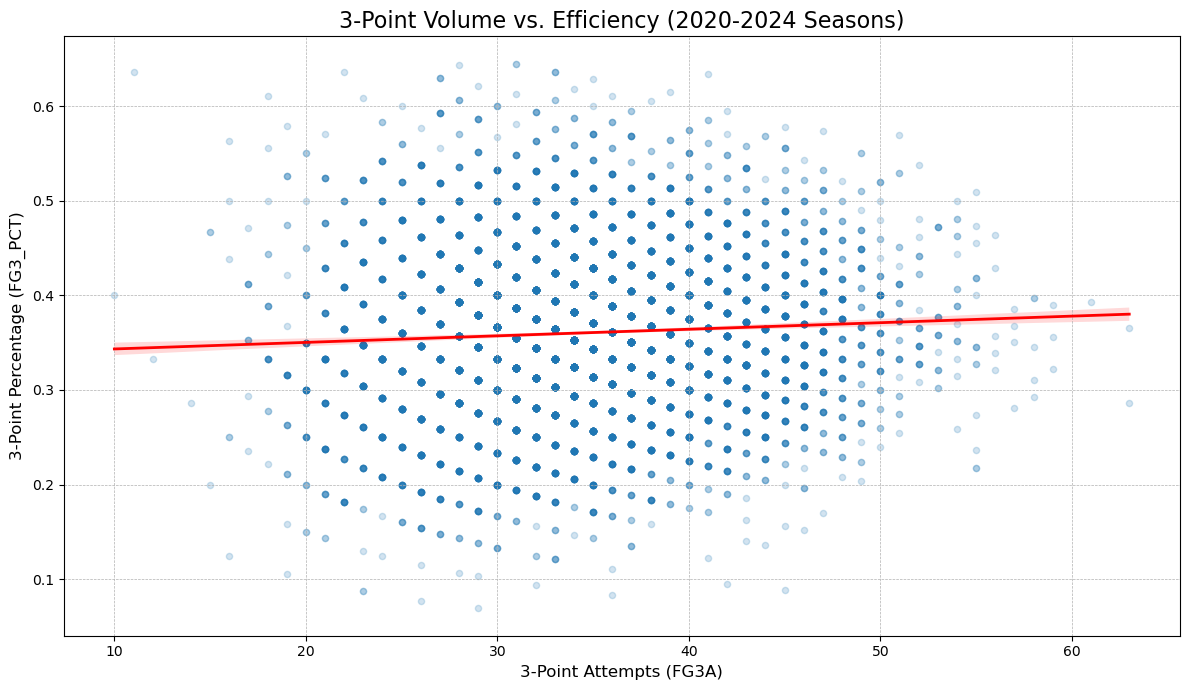

In [361]:
plt.figure(figsize=(12, 7))
sns.regplot(x='FG3A', y='FG3_PCT', data=nba_df,
            scatter_kws={'alpha':0.2, 's':20},  # Make points semi-transparent to see density
            line_kws={'color':'red', 'linewidth':2})

plt.title('3-Point Volume vs. Efficiency (2020-2024 Seasons)', fontsize=16)
plt.xlabel('3-Point Attempts (FG3A)', fontsize=12)
plt.ylabel('3-Point Percentage (FG3_PCT)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

While efficiency is critical, it is important to note, however, that the modern NBA game places a heavy emphasis on 3-point shooting volume. The analysis shows a positive relationship between the number of 3-point attempts and the 3-point percentage. This suggests that teams built around 3-point shooting (high attempt volume) tend to be more efficient at it, likely due to having specialized personnel and offensive schemes designed to generate high-quality looks from beyond the arc. It counters the simple assumption that more shots would lead to lower efficiency, indicating that volume is a feature of a specific, and often successful, offensive strategy.

This being said, a team's playstyle can alter the data and the chart above. Below, we can see the differing playstyles of every team.

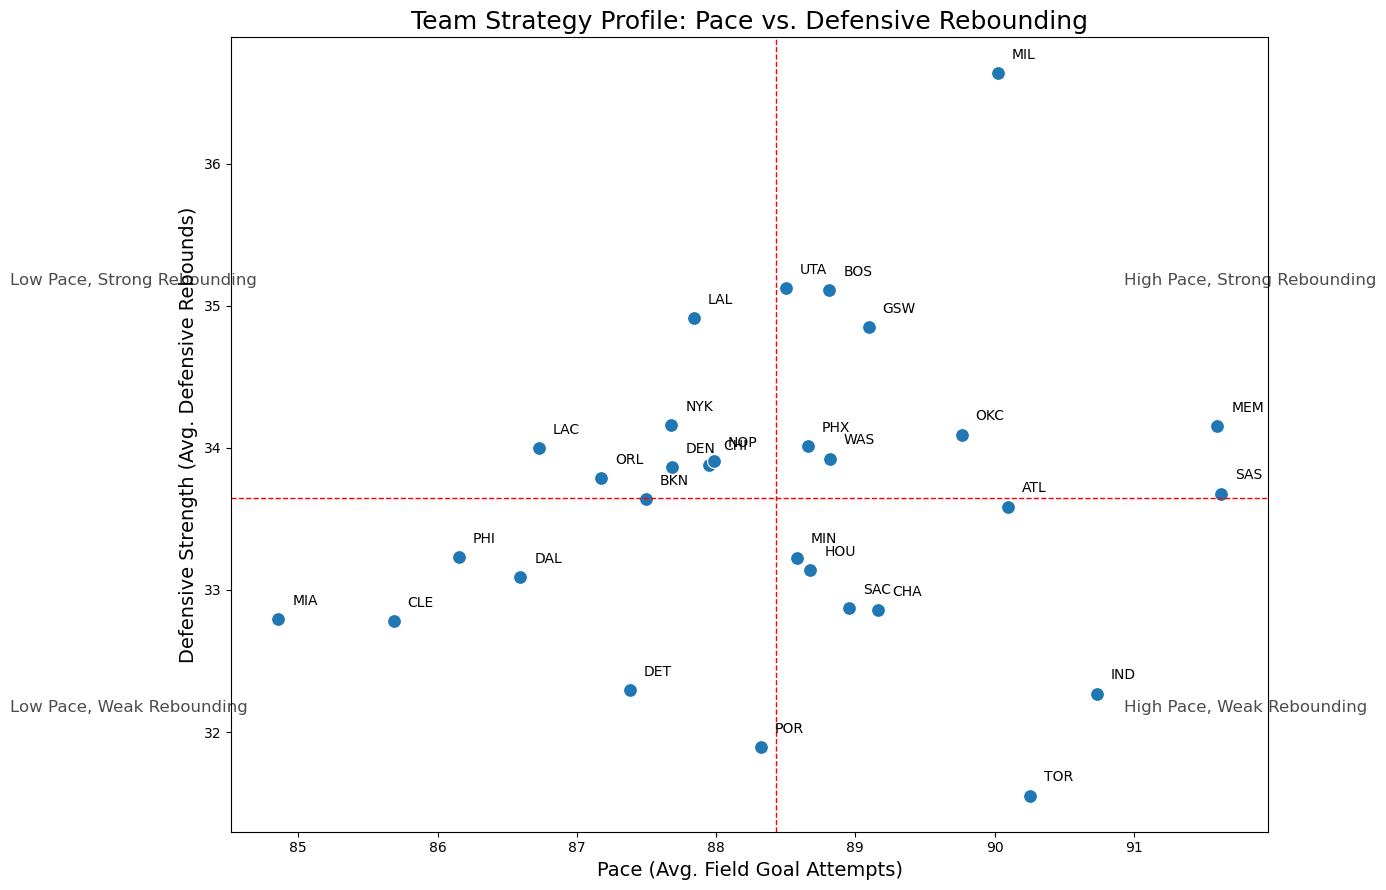

In [362]:
# ========== Create the Team Strategy Profile chart ==========
team_avg_stats = (
    nba_df.groupby(["TEAM","SEASON"], as_index=False)[["FGA","DREB"]]
          .mean()
    .groupby("TEAM", as_index=False)[["FGA","DREB"]].mean())

plt.figure(figsize=(14, 9))
sns.scatterplot(x='FGA', y='DREB', data=team_avg_stats, s=100)

# Add annotations for each team
for i in range(team_avg_stats.shape[0]):
    plt.text(x=team_avg_stats.FGA[i] + 0.1, y=team_avg_stats.DREB[i] + 0.1,
             s=team_avg_stats.TEAM[i],
             fontdict=dict(color='black', size=10))

# Add lines for league average to create quadrants
avg_fga = team_avg_stats.FGA.mean()
avg_dreb = team_avg_stats.DREB.mean()
plt.axvline(avg_fga, color='red', linestyle='--', linewidth=1)
plt.axhline(avg_dreb, color='red', linestyle='--', linewidth=1)

# Add quadrant labels
plt.text(avg_fga + 2.5, avg_dreb + 1.5, 'High Pace, Strong Rebounding', fontsize=12, alpha=0.7)
plt.text(avg_fga - 5.5, avg_dreb + 1.5, 'Low Pace, Strong Rebounding', fontsize=12, alpha=0.7)
plt.text(avg_fga - 5.5, avg_dreb - 1.5, 'Low Pace, Weak Rebounding', fontsize=12, alpha=0.7)
plt.text(avg_fga + 2.5, avg_dreb - 1.5, 'High Pace, Weak Rebounding', fontsize=12, alpha=0.7)

plt.title('Team Strategy Profile: Pace vs. Defensive Rebounding', fontsize=18)
plt.xlabel('Pace (Avg. Field Goal Attempts)', fontsize=14)
plt.ylabel('Defensive Strength (Avg. Defensive Rebounds)', fontsize=14)
plt.grid(False)
plt.tight_layout()
plt.show()


To visualize differing team strategies, average field goal attempts (a proxy for pace) and defensive rebounds were plotted for each team. This creates four distinct profiles: High Pace/Strong Rebounding, Low Pace/Strong Rebounding, Low Pace/Weak Rebounding, and High Pace/Weak Rebounding. Teams in the top-right quadrant exhibit a fast-paced offense combined with strong defensive rebounding—a profile often associated with successful, modern teams that can control the game on both ends of the floor. This chart effectively segments teams by their core strategic identity.

The most successful teams in the league at the top right quadrant because they have balance. They have the sharpshooters who can put up shots anywhere anytime, but they also have the defensive rhythm that defines a good team (in this case, good defensive rebounding skills).

## Conclusion

This exploratory data analysis of NBA regular season games from 2020-2024 sought to identify the statistical drivers of winning. The findings converge on a clear narrative: successful teams in the modern era are not just high-volume shooters but are fundamentally efficient, secure with the basketball, and strong on the defensive glass.

Key Findings:

Shooting Efficiency is Paramount: The strongest statistical link to winning is a team's ability to convert field goals at a high percentage (FG_PCT) and avoid having their shots blocked (BLKA).

Possession is Key: Winning is strongly associated with maximizing possessions through superior rebounding (REB) and minimizing wasted possessions by limiting turnovers (TOV).

Strategy and Specialization Matter: The positive correlation between 3-point attempts and 3-point percentage indicates that a dedicated, high-volume approach to 3-point shooting is a viable and efficient strategy for teams with the right personnel.

Limitations and Next Steps:

This analysis provides a strong directional understanding of what contributes to winning. However, it does not account for opponent strength, game location (home vs. away), or the differential in performance between a team and its opponent in a given game.

The logical next step is to build a predictive model. The engineered features from this EDA, especially once converted into performance differentials (e.g., FG_PCT minus opponent's FG_PCT), could be used as inputs for a logistic regression model to predict the probability of a win. This is my intended next step in this project, but due to my current limitations in knowledge, I will leave this for later.

Thank you for reading my analysis and findings.